<a href="https://colab.research.google.com/github/Thannos/Aula11/blob/master/Aula11_Paulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Jacobi

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from pprint import pprint
from numpy import array, zeros, diag, diagflat, dot

#Def Jacobi Method

In [0]:
def jacobi(a,b,x,n):#Ax=B  - n é a forma A3x3 e B3
  if(np.linalg.det(a)!=0):
    #decompor em x(1)=Cx(0)+G
    g=np.matrix([[0],[0],[0]]) #novo vetor resposta
    c=np.matrix([[0,0,0],[0,0,0],[0,0,0]]) #diagonal princial nula
    for i in range(n):
      g[i]=b[i]/a[i,i]#calculando matriz G
      for j in range(n):
        if(j!=i):
          c[i,j]=a[i,j]#calculando matriz C
    #calcular x(0)
    #x=np.matrix([[0],[0],[0]])#Utilizando a pressuposição inicial de vetor nulo
    aux=0
    for i in range(n):
      x[i]=1/a[i,i]
      aux=b[i]
      for j in range(n):
        aux-=(a[i,j]*x[j])
      x[i]*=aux
    #calculando x(1), sendo, x(1)=Cx(0)+G
    x=(c*x)+g
    return x

In [42]:
a=np.array([[10,2,1],[1,5,1],[2,3,10]])
b=np.array([7,-8,6])
x=np.matrix([[0],[0],[0]])
x=jacobi(a,b,x,3)
print(x)

[[ 0]
 [-1]
 [ 0]]


#Def do Critério das Linhas

In [0]:
def criterio(a,n): #passa a matriz A para calcular o critério das linhas
  if(np.linalg.det(a)!=0):
    #c funciona como alpha
    c=[0,0,0]
    x=float(0.0)
    m=0
    for i in range(n):
      aux=float(0.0)
      for j in range(n):
        if(j!=i):
          aux+=a[i,j]#somatória da linha exceto pelo valor da diagonal principal
      if(aux/a[i,i]<1):#só salva valores menor que 1
        c[i]=aux/a[i,i]#Resultado é o valor do critério das linhas
      if(x<c[i]):
        x=c[i]#salva o maior valor do vetor
        m=i#salva o indice que é quantas vezes vai se repetir o método de jacobi
    return x,i

##Exemplo A

In [63]:
#dado a matriz A calcular o critério das linhas para o mesmo
a=np.array([[10,2,1],[1,5,1],[2,3,10]])
x,m=criterio(a,3)
print(x,'\tk =',m)

0.5 	k = 2


##Exemplo B

In [64]:
#dado a matriz A e o vetor B usar o critério das linhas nos mesmos para calcular o método de jacobi
a=np.array([[1,1],[1,-3]])
b=np.array([3,-3])
x,m=criterio(a,2)
print(x,'\n')
aux=np.matrix([[0],[0],[0]])
for i in range(m):
  aux=jacobi(a,b,aux,2)
print(aux)

0.0 

[[3]
 [3]
 [0]]


##Exemplo C

In [0]:
def troca(a,b,n):
  if(a[0,0]<a[1,0]):#verifica se a necessidade de troca entre as linhas
    #realiza a troca
    for i in range(2):
      #entre o vetor B
      aux=b[i]
      b[i]=b[i+1]
      b[i+1]=aux
      for j in range(n):
        #entre a matriz A
        aux=a[i,j]
        a[i,j]=a[i+1,j]
        a[i+1,j]=aux
    return a,b#retorna a matriz e o vetor trocados

In [68]:
#dado a matriz A e o vetor B usar o critério das linhas nos mesmos para calcular o método de jacobi
a=np.array([[1,3,1],[5,2,2],[0,6,8]])
b=np.array([-2,3,-6])
a,b=troca(a,b,3)#necessário realizar troca entre as linhas antes
x,m=criterio(a,3)
print(x,'\n')
aux=np.matrix([[0],[0],[0]])
for i in range(m):
  aux=jacobi(a,b,aux,3)
print(aux)

0.8 

[[ -6]
 [-25]
 [ -2]]


#Distancia entre x(1) E x(0)

In [0]:
def distancia(a,b,n):#x(1),x(0),tamanho
  d=a-b#x(1)-x(0)
  aux=[]
  if(d<0):
    d*=-1#módulo da subtração
  for i in range (n):
    aux[i]=d/max(a[i])#calculo da distancia em si
  return aux

#

#Interpretação do método de Jacobi

x1 = 3 	x2 = 1.0
x1 = 2.0 	x2 = 2.0
x1 = 1.0 	x2 = 1.6666666666666665
x1 = 1.3333333333333335 	x2 = 1.3333333333333333


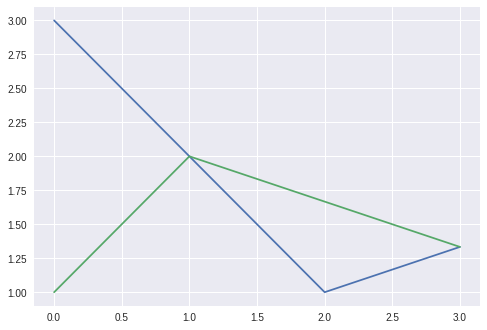

In [81]:
x1=0
x2=0
n=4
k1=[]
k2=[]
for i in range (n):
  aux=x1
  x1=3-x2
  k1.append(x1)
  x2=1/3*(3+aux)
  k2.append(x2)
  print('x1 =',x1,'\tx2 =',x2)
#não sei como plotar o gráfico
plt.plot(k1,label='x1')
plt.plot(k2,label='x2')
plt.show()

#Interpretação para o método Guass-Seidel

x1 = 3 	x2 = 2.0
x1 = 1.0 	x2 = 1.3333333333333333
x1 = 1.6666666666666667 	x2 = 1.5555555555555556
x1 = 1.4444444444444444 	x2 = 1.4814814814814814


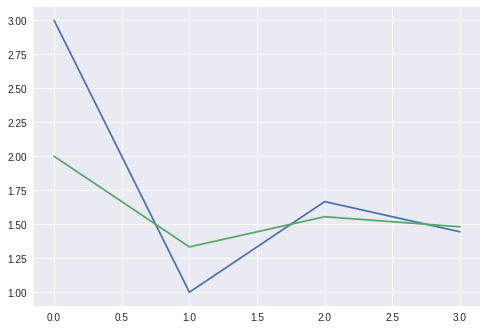

In [82]:
x1=0
x2=0
n=4
k1=[]
k2=[]
for i in range (n):
  x1=3-x2
  k1.append(x1)
  x2=1/3*(3+x1)
  k2.append(x2)
  print('x1 =',x1,'\tx2 =',x2)
#não sei como plotar o gráfico
plt.plot(k1,label='x1')
plt.plot(k2,label='x2')
plt.show()